In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import statsmodels.api as sm

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from sklearn.datasets import load_boston
boston_data=load_boston()
df=pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
bs_data= load_boston()

bs_data.data.shape, bs_data.target.shape

((506, 13), (506,))

In [6]:
df= pd.DataFrame(bs_data.data,columns=bs_data.feature_names)

In [7]:
#MEDV
bs_data['PRICE'] = bs_data.target
bs_data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [8]:
print(bs_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [9]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [11]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [12]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


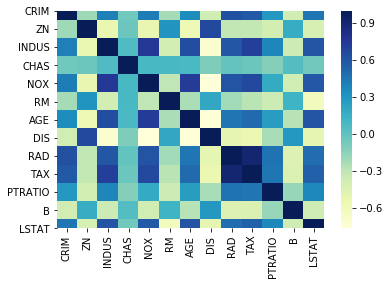

In [13]:
sns.heatmap(df.corr(), cmap="YlGnBu")

In [14]:
# CRIM: Per capita crime rate by town
# ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
# INDUS: Proportion of non-retail business acres per town
# CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# NOX: Nitric oxide concentration (parts per 10 million)
# RM: Average number of rooms per dwelling
# AGE: Proportion of owner-occupied units built prior to 1940
# DIS: Weighted distances to five Boston employment centers
# RAD: Index of accessibility to radial highways
# TAX: Full-value property tax rate per $10,000
# PTRATIO: Pupil-teacher ratio by town
# B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
# LSTAT: Percentage of lower status of the population
# MEDV: Median value of owner-occupied homes in $1000s

In [15]:
df.shape

(506, 13)

In [19]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [16]:
X=pd.DataFrame(df,columns=['CRIM','ZN','INDUS','CHAS','NOX','RM'])

In [17]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM
0,0.00632,18.0,2.31,0.0,0.538,6.575
1,0.02731,0.0,7.07,0.0,0.469,6.421
2,0.02729,0.0,7.07,0.0,0.469,7.185
3,0.03237,0.0,2.18,0.0,0.458,6.998
4,0.06905,0.0,2.18,0.0,0.458,7.147
...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593
502,0.04527,0.0,11.93,0.0,0.573,6.120
503,0.06076,0.0,11.93,0.0,0.573,6.976
504,0.10959,0.0,11.93,0.0,0.573,6.794


In [22]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM
0,0.00632,18.0,2.31,0.0,0.538,6.575
1,0.02731,0.0,7.07,0.0,0.469,6.421
2,0.02729,0.0,7.07,0.0,0.469,7.185
3,0.03237,0.0,2.18,0.0,0.458,6.998
4,0.06905,0.0,2.18,0.0,0.458,7.147
...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593
502,0.04527,0.0,11.93,0.0,0.573,6.120
503,0.06076,0.0,11.93,0.0,0.573,6.976
504,0.10959,0.0,11.93,0.0,0.573,6.794


In [18]:
y=bs_data.target

In [19]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

# Linear regression using Stats Model

In [28]:
X_constantant=sm.add_constant(X)

C:\Users\amin1\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [29]:
pd.DataFrame(X_constantant)

,const,CRIM,ZN,INDUS,CHAS,NOX,RM
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147
...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,11.93,0.0,0.573,6.593
502,1.0,0.04527,0.0,11.93,0.0,0.573,6.120
503,1.0,0.06076,0.0,11.93,0.0,0.573,6.976
504,1.0,0.10959,0.0,11.93,0.0,0.573,6.794


In [30]:
model =sm.OLS(y,X_constantant)

In [31]:
lr=model.fit()

In [32]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     118.4
Date:                Fri, 17 Apr 2020   Prob (F-statistic):           1.32e-92
Time:                        15:28:09   Log-Likelihood:                -1616.3
No. Observations:                 506   AIC:                             3247.
Df Residuals:                     499   BIC:                             3276.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.9546      3.214     -5.587      0.000     -24.269     -11.640
CRIM          -0.1769      0.035     -5.114      0.000      -0.245      -0.109
ZN             0.0213      0.014      1.537      0.125      -0.006       0.048
INDUS         -0.1437      0.064     -2.247      0.025      -0.269      -0.018
CHAS           4.7847      1.059      4.518      0.000       2.704       6.866
NOX           -7.1849      3.694     -1.945      0.052     -14.442       0.072
RM             7.3416      0.417     17.597      0.000       6.522       8.161
==============================================================================
Omnibus:                      218.887   Durbin-Watson:                   0.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1532.877
Skew:                           1.738   Prob(JB):                         0.00
Kurtosis:                      10.786   Cond. No.                         420.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Stats Model using Formula

In [34]:
import statsmodels.formula.api as smf

In [37]:
form_lr=smf.ols(formula='y~ CRIM+ZN+INDUS+CHAS+RM+RAD+TAX+PTRATIO+B+LSTAT', data=df)
mlr=form_lr.fit()

In [38]:
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     119.4
Date:                Fri, 17 Apr 2020   Prob (F-statistic):          4.63e-125
Time:                        15:47:11   Log-Likelihood:                -1529.7
No. Observations:                 506   AIC:                             3081.
Df Residuals:                     495   BIC:                             3128.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.5253      4.384      3.770      0.000       7.912      25.139
CRIM          -0.0757      0.035     -2.192      0.029      -0.144      -0.008
ZN             0.0049      0.012      0.398      0.691      -0.019       0.029
INDUS          0.0791      0.058      1.359      0.175      -0.035       0.193
CHAS           2.7909      0.909      3.069      0.002       1.004       4.578
RM             4.4362      0.423     10.475      0.000       3.604       5.268
RAD            0.2851      0.069      4.104      0.000       0.149       0.422
TAX           -0.0133      0.004     -3.353      0.001      -0.021      -0.006
PTRATIO       -0.9308      0.127     -7.305      0.000      -1.181      -0.680
B              0.0104      0.003      3.686      0.000       0.005       0.016
LSTAT         -0.5192      0.049    -10.559      0.000      -0.616      -0.423
==============================================================================
Omnibus:                      201.669   Durbin-Watson:                   0.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1024.263
Skew:                           1.695   Prob(JB):                    3.84e-223
Kurtosis:                       9.091   Cond. No.                     1.09e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Which Columns has the most correlation in the dataset

# Heatmap

In [171]:
corr_matrix=df.corr()
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [172]:
corr_matrix[np.abs(corr_matrix)<0.6]=0
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.625505,0.000000,0.0,0.0,0.000000
ZN,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.664408,0.000000,0.000000,0.0,0.0,0.000000
INDUS,0.000000,0.000000,1.000000,0.0,0.763651,0.000000,0.644779,-0.708027,0.000000,0.720760,0.0,0.0,0.603800
CHAS,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
NOX,0.000000,0.000000,0.763651,0.0,1.000000,0.000000,0.731470,-0.769230,0.611441,0.668023,0.0,0.0,0.000000
RM,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,-0.613808
AGE,0.000000,0.000000,0.644779,0.0,0.731470,0.000000,1.000000,-0.747881,0.000000,0.000000,0.0,0.0,0.602339
DIS,0.000000,0.664408,-0.708027,0.0,-0.769230,0.000000,-0.747881,1.000000,0.000000,0.000000,0.0,0.0,0.000000
RAD,0.625505,0.000000,0.000000,0.0,0.611441,0.000000,0.000000,0.000000,1.000000,0.910228,0.0,0.0,0.000000
TAX,0.000000,0.000000,0.720760,0.0,0.668023,0.000000,0.000000,0.000000,0.910228,1.000000,0.0,0.0,0.000000


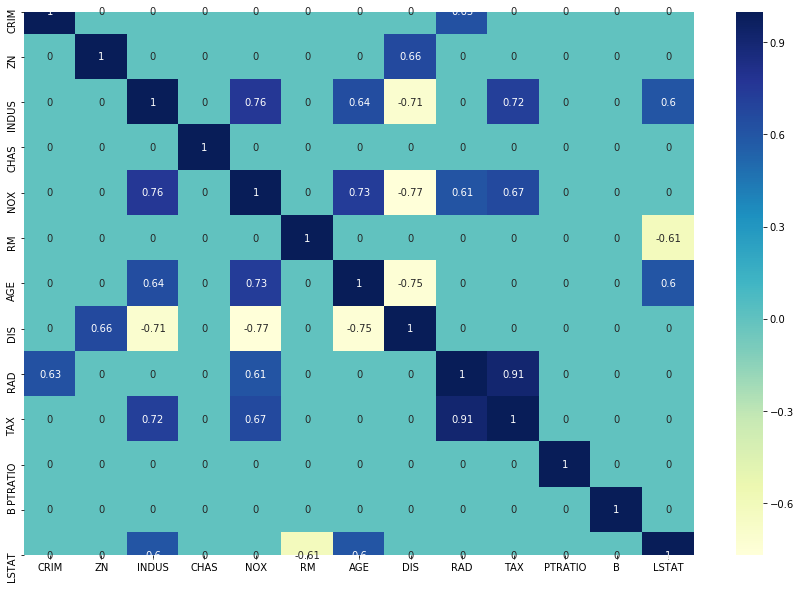

In [181]:
import matplotlib.pyplot as plt
corr_matrix=df.corr()
corr_matrix
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,cmap='YlGnBu',annot=True)

# Eigen Values And Eigen Vectors

Relation between best fit line and eigenvector of maximum eigen value of an estimated covariance matrix 

In [42]:
eigenvalues,eigenvectors= np.linalg.eig(df.corr())

In [43]:
eigenvalues

array([6.12684883, 1.43327512, 1.24261667, 0.85757511, 0.83481594,
       0.65740718, 0.53535609, 0.39609731, 0.06350926, 0.27694333,
       0.16930298, 0.18601437, 0.22023782])

In [44]:
eigenvectors

array([[-0.2509514 ,  0.31525237, -0.24656649, -0.06177071,  0.08215692,
         0.21965961, -0.77760721, -0.15335048, -0.0459523 , -0.26039028,
         0.08676107,  0.10964435, -0.01936913],
       [ 0.25631454,  0.3233129 , -0.29585782, -0.12871159,  0.32061699,
         0.3233881 ,  0.27499628,  0.40268031,  0.08091897, -0.35813749,
        -0.07142528, -0.26275629, -0.26752723],
       [-0.34667207, -0.11249291,  0.01594592, -0.01714571, -0.00781119,
         0.0761379 ,  0.33957645, -0.17393172,  0.25107654, -0.64441615,
        -0.11319963,  0.30316943,  0.36353226],
       [-0.00504243, -0.45482914, -0.28978082, -0.81594136,  0.08653094,
        -0.16749014, -0.07413621,  0.02466215, -0.03592171,  0.01372777,
        -0.00398268, -0.01392667,  0.00618184],
       [-0.34285231, -0.21911553, -0.12096411,  0.12822614,  0.13685356,
         0.15298267,  0.19963484, -0.08012056, -0.04363045,  0.01852201,
         0.80432257, -0.11131888, -0.23105645],
       [ 0.18924257, -0.149331

In [78]:
pd.Series(eigenvalues).sort_values()

8     0.063509
10    0.169303
11    0.186014
12    0.220238
9     0.276943
7     0.396097
6     0.535356
5     0.657407
4     0.834816
3     0.857575
2     1.242617
1     1.433275
0     6.126849
dtype: float64

Which data column has the most value for eigen value? find the least eigen vector for that column.

In [79]:
np.abs(pd.Series(eigenvectors[:,8])).sort_values(ascending=False)

9     0.720233
8     0.633490
2     0.251077
1     0.080919
0     0.045952
5     0.045567
4     0.043630
6     0.038551
3     0.035922
12    0.024432
10    0.023398
7     0.018299
11    0.004463
dtype: float64

In [80]:
print(df.columns[2],df.columns[8],df.columns[9])

INDUS RAD TAX


In statistics, multicollinearity (also collinearity) is a phenomenon in which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy. In this situation the coefficient estimates of the multiple regression may change erratically in response to small changes in the model or the data. Multicollinearity does not reduce the predictive power or reliability of the model as a whole, at least within the sample data set; it only affects calculations regarding individual predictors. That is, a multivariate regression model with collinear predictors can indicate how well the entire bundle of predictors predicts the outcome variable, but it may not give valid results about any individual predictor, or about which predictors are redundant with respect to others. 

# Another way of finding the best columns is to calculate R2 score for each model

Now lets look at the precoss through which the linear regression is based (back end). Actually The regression line gets updated each time

Gradient decent minimization inspired by Chric Mc Cormick on Gradient Decent Derivation

# Linear regression and gradient decent

In [5]:
from sklearn.datasets import load_boston
boston_data=load_boston()
df=pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
X=df[['LSTAT']]
y=boston_data.target

In [17]:
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
sc_y=StandardScaler()
X_std=sc_x.fit_transform(X)
y_std=sc_y.fit_transform(y.reshape(-1,1)).flatten()

In [18]:
y_std.flatten().shape

(506,)

In [19]:
type(y_std.flatten())

numpy.ndarray

In [20]:
y_std.shape

(506,)

In [21]:
type(y_std)

numpy.ndarray

In [24]:
# formula of gradient decent from sklearn
alpha = 0.01
w_=np.zeros(1+X_std.shape[1])
cost_=[]
n_=100
for i in range(n_):
    y_pred=np.dot(X_std,w_[1:])+w_[0]
    errors=(y_std-y_pred)
    
    w_[1:] += alpha * X_std.T.dot(errors)
    w_[0] += alpha *errors.sum()
    
    cost=(errors**2).sum()/2.0
    cost_.append(cost)

Text(0.5, 0, 'Epoch')

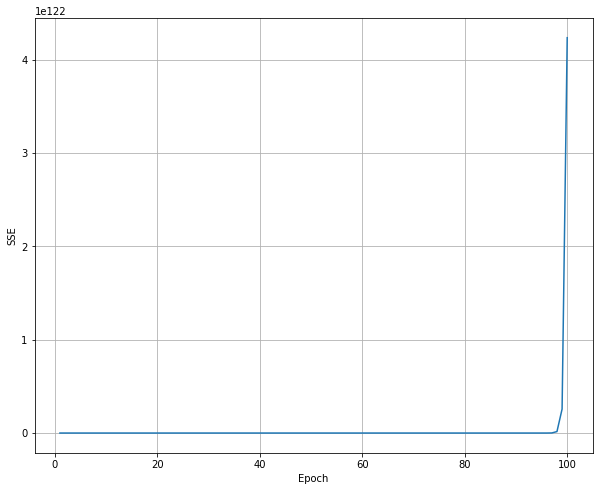

In [25]:
plt.figure(figsize=(10,8))
plt.plot(range(1,n_+1),cost_)
plt.grid()
plt.ylabel('SSE')#sum of squared errors
plt.xlabel('Epoch')

As we increase the number of training data on our algorithm the error decreeses

What happens when you change the learning rate to 0.01?

In [88]:
w_

array([-7.57793828e-16, -7.33562757e-01])

The first term is intercept and the second term is coeficient

Now lets apply the "RM" column and see the results for that column.

In [79]:
X=df[['RM']]
y=boston_data.target

In [80]:
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
sc_y=StandardScaler()
X_std=sc_x.fit_transform(X)
y_std=sc_x.fit_transform(y.reshape(-1,1)).flatten()

In [83]:
alpha = 0.001
w_=np.zeros(1+X_std.shape[1])
cost_=[]
n_=50
for i in range(n_):
    y_pred=np.dot(X_std,w_[1:])+w_[0]
    errors=(y_std-y_pred)
    
    w_[1:] += alpha * X_std.T.dot(errors)
    w_[0] += alpha *errors.sum()
    
    cost=(errors**2).sum()/2.0
    cost_.append(cost)

Text(0.5, 0, 'Epoch')

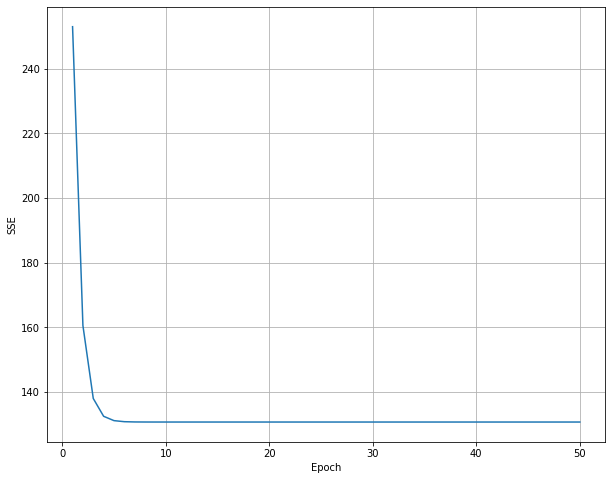

In [84]:
plt.figure(figsize=(10,8))
plt.plot(range(1,n_+1),cost_)
plt.grid()
plt.ylabel('SSE')#sum of squared errors
plt.xlabel('Epoch')

At Which point does the gredient decent method explode?

Once a gaine Linear regression method:

# Linear Regression

Coefficient estimated: [0.47134857]


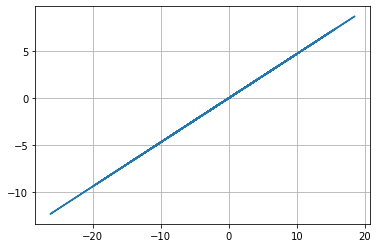

In [27]:
from sklearn.linear_model import LinearRegression
np.random.seed(42)
n_samples=100
rng= np.random.randn(n_samples)*10
y_gen=0.5 *rng+2*np.random.randn(n_samples)

lr=LinearRegression()
lr.fit(rng.reshape(-1,1),y_gen)
model_pred=lr.predict(rng.reshape(-1,1))

plt.plot(rng,model_pred)
print('Coefficient estimated:', lr.coef_)
plt.grid()

Lets add an outlier to the datapoints and see the linear regression result

In [28]:
idx=rng.argmax()
y_gen[idx]=200

Coefficient estimated: [0.92796845]


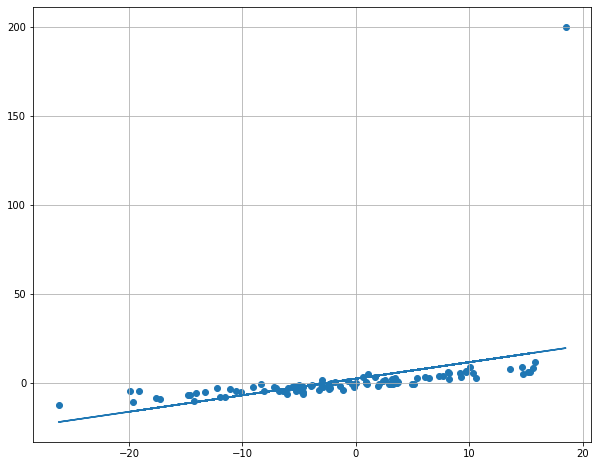

In [29]:
o_lr=LinearRegression(normalize=True)
o_lr.fit(rng.reshape(-1,1),y_gen)
o_model_pred=o_lr.predict(rng.reshape(-1,1))
plt.figure(figsize=(10,8))
plt.scatter(rng,y_gen)
plt.plot(rng,o_model_pred)
print('Coefficient estimated:', o_lr.coef_)
plt.grid()

# Regularizes regression

Why regularized method?
They try to address some of the problems of ordinary least squares by imposing a penalty term to the size of the coefficient.

https://scikit-learn.org/stable/modules/linear_model.html

# Ridge Regression

The complexity parameter controls the amount of shrinkage: the larger the value of alpha , the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.

When the Alpha is clo9se to zero you have no penalty term so it functions as OLS. as you see in the figure the weights explode. As alpha increase the weights start to become robust.

L2 definition!

Coefficient estimated: [0.46398423]


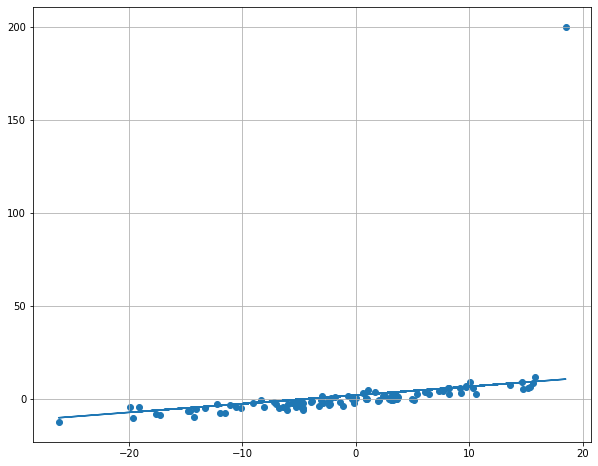

In [30]:
from sklearn.linear_model import Ridge
plt.figure(figsize=(10,8))
plt.scatter(rng,y_gen)

ridge_mod=Ridge(alpha=1, normalize=True)
ridge_mod.fit(rng.reshape(-1,1),y_gen)
ridge_model_pred=ridge_mod.predict(rng.reshape(-1,1))

plt.plot(rng,ridge_model_pred)
print('Coefficient estimated:', ridge_mod.coef_)
plt.grid()

# Lasso Regression

L1 definition!

C:\Users\amin1\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
C:\Users\amin1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\amin1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17432.771064253502, tolerance: 4.189682252548892
  positive)


Coefficient estimated: [0.92796845]


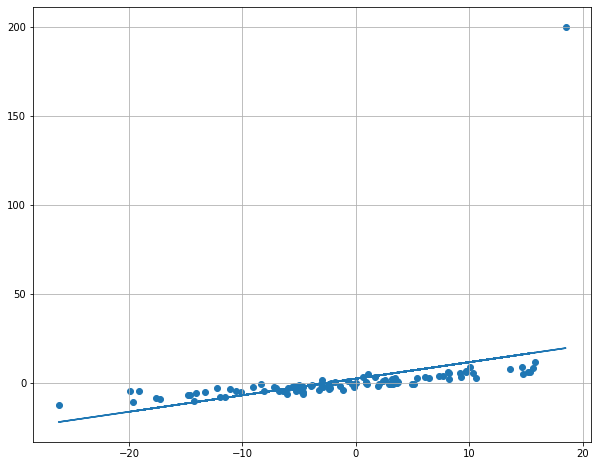

In [33]:
from sklearn.linear_model import Lasso
plt.figure(figsize=(10,8))
plt.scatter(rng,y_gen)

lasso_mod=Lasso(alpha=0, normalize=True)
lasso_mod.fit(rng.reshape(-1,1),y_gen)
lasso_model_pred=lasso_mod.predict(rng.reshape(-1,1))

plt.plot(rng,lasso_model_pred)
print('Coefficient estimated:', lasso_mod.coef_)
plt.grid()

# Elastic Net Regression

The combination of Lasso and Ridge (L1 and L2)

Coefficient estimated: [0.4584509]


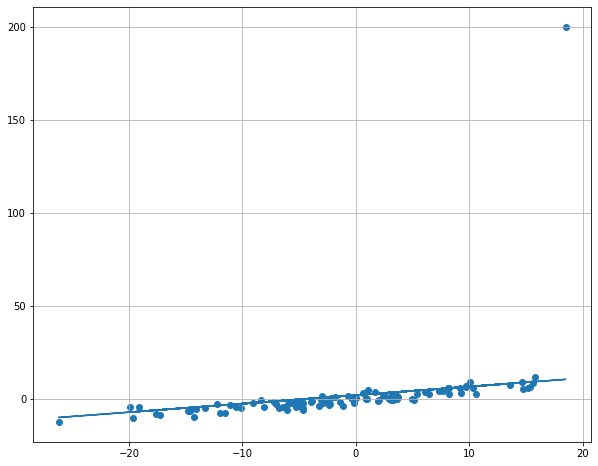

In [34]:
from sklearn.linear_model import ElasticNet
plt.figure(figsize=(10,8))
plt.scatter(rng,y_gen)

en_mod=ElasticNet(alpha=0.02, normalize=True)
en_mod.fit(rng.reshape(-1,1),y_gen)
en_model_pred=en_mod.predict(rng.reshape(-1,1))

plt.plot(rng,en_model_pred)
print('Coefficient estimated:', en_mod.coef_)
plt.grid()

When you have some columns  that are highly correlated LASSO drops one of the columns, Ridge wight to each column and add the up. Elastic Net is the best one.

# Polynomial Regression

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import pandas as pd

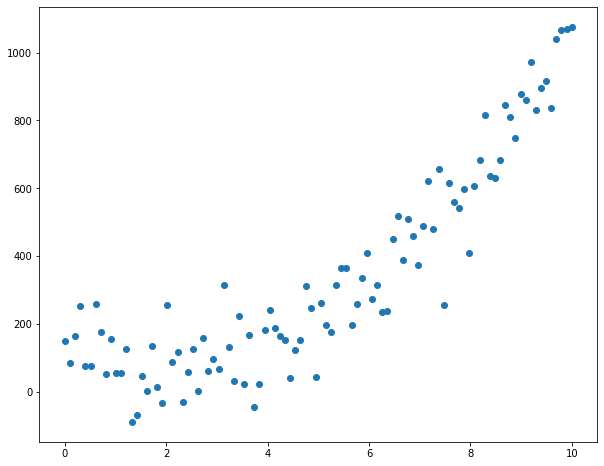

In [35]:
np.random.seed(42)
n_samples=100
X=np.linspace(0,10,100)
rng= np.random.randn(n_samples)*100

y= X**3+rng+100
plt.figure(figsize=(10,8))
plt.scatter(X,y)

# Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Coefficient estimated: [91.68031643]
R2 score is: 0.7643394574930141


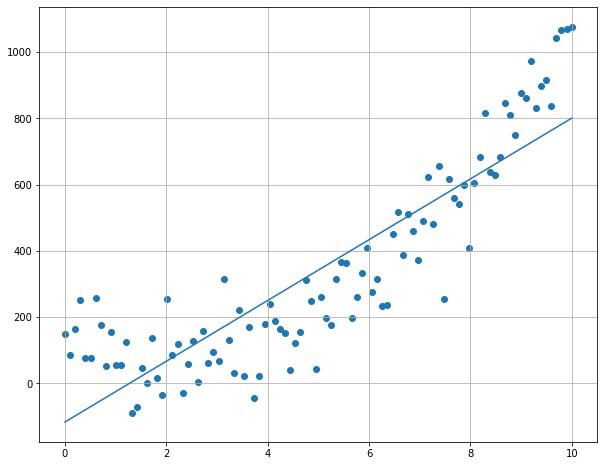

In [37]:
lr=LinearRegression()
lr.fit(X.reshape(-1,1),y)
model_pred=lr.predict(X.reshape(-1,1))

plt.figure(figsize=(10,8))
plt.scatter(X,y)
plt.plot(X,model_pred)
print('Coefficient estimated:', lr.coef_)
print('R2 score is:',r2_score(y,model_pred))
plt.grid()

# Polynomial

https://scikit-learn.org/stable/modules/linear_model.html#polinomial-regression-extending-linear-models-with-basis-functions

In [38]:
from sklearn.preprocessing import PolynomialFeatures

In [39]:
poly_reg=PolynomialFeatures(degree=2)
X_poly=poly_reg.fit_transform(X.reshape(-1,1))

In [40]:
lin_reg_2=LinearRegression()
lin_reg_2.fit(X_poly,y.reshape(-1,1))
y_pred=lin_reg_2.predict(X_poly)

#grid search
#loop for k in range 10

Coefficient estimated: [[  0.         -65.64991648  15.73302329]]
R2 score is: 0.9173858308909386


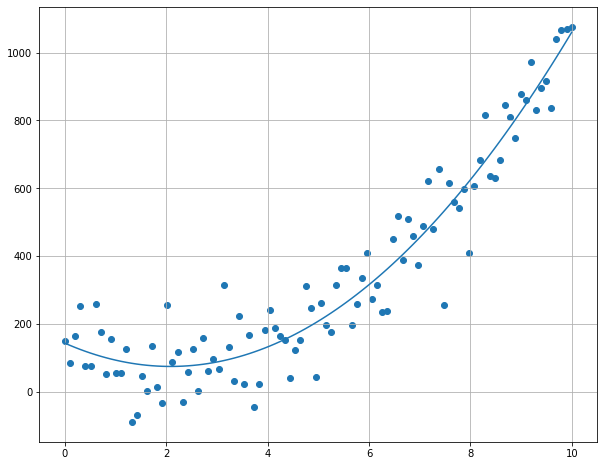

In [41]:
plt.figure(figsize=(10,8))
plt.scatter(X,y)
plt.plot(X,y_pred)
print('Coefficient estimated:', lin_reg_2.coef_)
print('R2 score is:',r2_score(y,y_pred))
plt.grid()

# On real data

In [28]:
df= load_boston()

In [29]:
df_boston= pd.DataFrame(df.data,columns=df.feature_names)
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [30]:
X_boston=df_boston['DIS'].values
y_boston=df_boston['NOX'].values

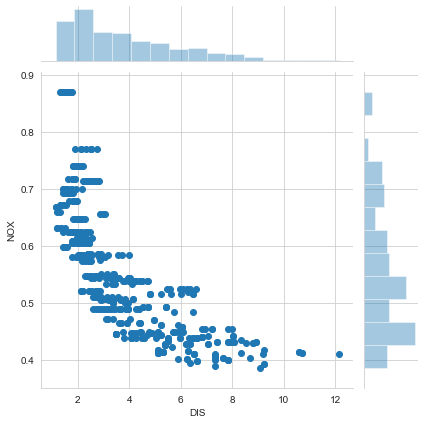

In [31]:
sns.jointplot(x='DIS',y='NOX',data=df_boston)

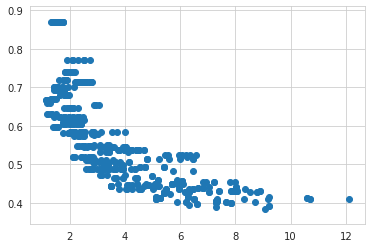

In [125]:
plt.scatter(X_boston,y_boston)

In [126]:
df_boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


Coefficient estimated: [-0.0423309]
R2 score is: 0.5917149670934201


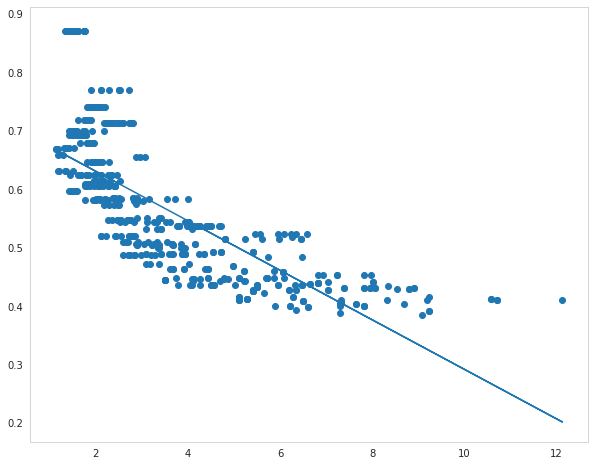

In [127]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr=LinearRegression()
lr.fit(X_boston.reshape(-1,1),y_boston)
model_pred=lr.predict(X_boston.reshape(-1,1))

plt.figure(figsize=(10,8))
plt.scatter(X_boston,y_boston)
plt.plot(X_boston,model_pred)
print('Coefficient estimated:', lr.coef_)
print('R2 score is:',r2_score(y_boston,model_pred))
plt.grid()

# Quadratic

In [82]:
poly_reg=PolynomialFeatures(degree=2)
X_poly_b=poly_reg.fit_transform(X_boston.reshape(-1,1))

In [83]:
lin_reg_2=LinearRegression()
lin_reg_2.fit(X_poly_b,y_boston)
X_fit=np.arange(X_boston.min(),X_boston.max(),1)[:,np.newaxis]




In [84]:
X_fit

array([[ 1.1296],
       [ 2.1296],
       [ 3.1296],
       [ 4.1296],
       [ 5.1296],
       [ 6.1296],
       [ 7.1296],
       [ 8.1296],
       [ 9.1296],
       [10.1296],
       [11.1296]])

In [85]:
y_pred=lin_reg_2.predict(poly_reg.fit_transform(X_fit.reshape(-1,1)))

Coefficient estimated: [91.68031643]
R2 score is: 0.6998562064647851


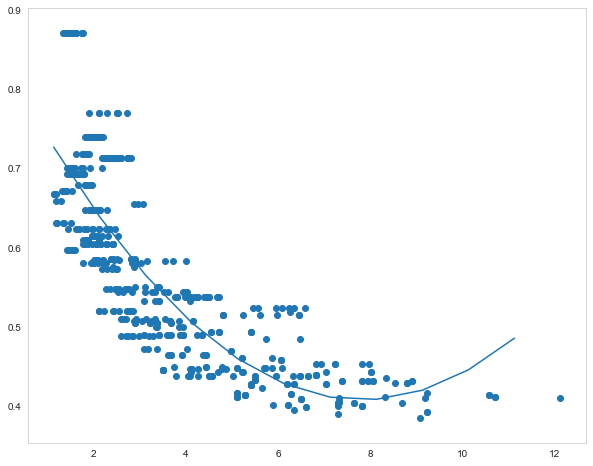

In [86]:
plt.figure(figsize=(10,8))
plt.scatter(X_boston,y_boston)
plt.plot(X_fit,y_pred)
print('Coefficient estimated:', lr.coef_)
print('R2 score is:',r2_score(y_boston,lin_reg_2.predict(X_poly_b)))
plt.grid()

# Cubic

In [87]:
poly_reg=PolynomialFeatures(degree=9)
X_poly_b=poly_reg.fit_transform(X_boston.reshape(-1,1))

In [88]:
lin_reg_2=LinearRegression()
lin_reg_2.fit(X_poly_b,y_boston)
X_fit=np.arange(X_boston.min(),X_boston.max(),1)[:,np.newaxis]


y_pred=lin_reg_2.predict(poly_reg.fit_transform(X_fit.reshape(-1,1)))

Coefficient estimated: [91.68031643]
R2 score is: 0.7296353501873988


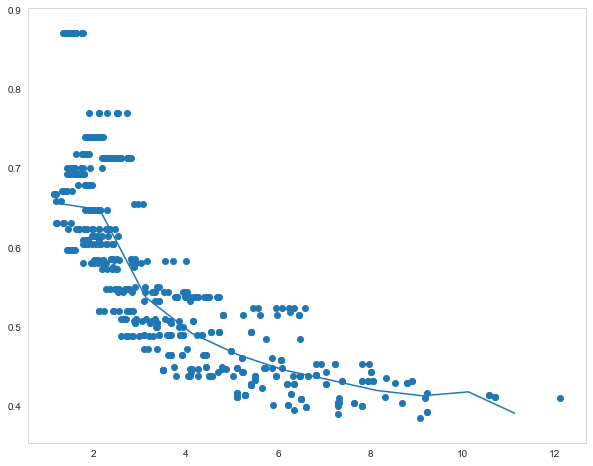

In [89]:
plt.figure(figsize=(10,8))
plt.scatter(X_boston,y_boston)
plt.plot(X_fit,y_pred)
print('Coefficient estimated:', lr.coef_)
print('R2 score is:',r2_score(y_boston,lin_reg_2.predict(X_poly_b)))
plt.grid()

Overfitting!

The notebook provided bu google playground

Assignment: chera X fit estefade mikonim?